Vérification et installation des dépendances...
Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
✓ PyTorch 2.9.0+cu126 déjà installé
✓ Scikit-learn déjà installé
✓ Seaborn déjà installé

✓ Toutes les dépendances sont prêtes!

Utilisation de: cuda
✓ Dataset chargé avec succès!
APERÇU DU DATASET

Nombre de lignes: 50000

Premières lignes:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Distribution des sentiments:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Valeurs manquantes:
review       0
sentiment    0
dtype: int64


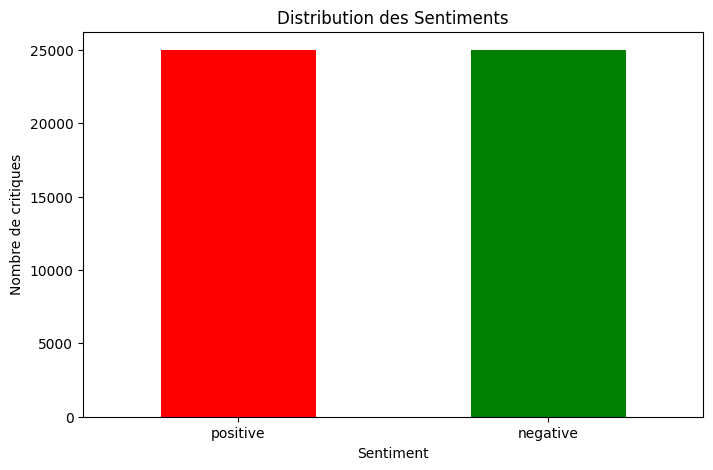


Vocabulaire construit: 15000 mots
Exemples de mots fréquents: ['the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this']

Taille des ensembles:
- Entraînement: 32000
- Validation: 8000
- Test: 10000

Le modèle a 4,288,514 paramètres entraînables

DÉBUT DE L'ENTRAÎNEMENT

Epoch 1/10
  Train Loss: 0.6799 | Train Acc: 56.13%
  Val Loss: 0.6641 | Val Acc: 61.02%
  ✓ Meilleur modèle sauvegardé!

Epoch 2/10
  Train Loss: 0.5729 | Train Acc: 68.64%
  Val Loss: 0.3624 | Val Acc: 84.26%
  ✓ Meilleur modèle sauvegardé!

Epoch 3/10
  Train Loss: 0.3298 | Train Acc: 85.84%
  Val Loss: 0.2761 | Val Acc: 88.55%
  ✓ Meilleur modèle sauvegardé!

Epoch 4/10
  Train Loss: 0.2488 | Train Acc: 90.11%
  Val Loss: 0.2449 | Val Acc: 89.96%
  ✓ Meilleur modèle sauvegardé!

Epoch 5/10
  Train Loss: 0.2070 | Train Acc: 92.05%
  Val Loss: 0.2299 | Val Acc: 90.89%
  ✓ Meilleur modèle sauvegardé!

Epoch 6/10
  Train Loss: 0.1728 | Train Acc: 93.67%
  Val Loss: 0.2470 | Val Acc: 90.88%
  Pas d'amélioration (1/

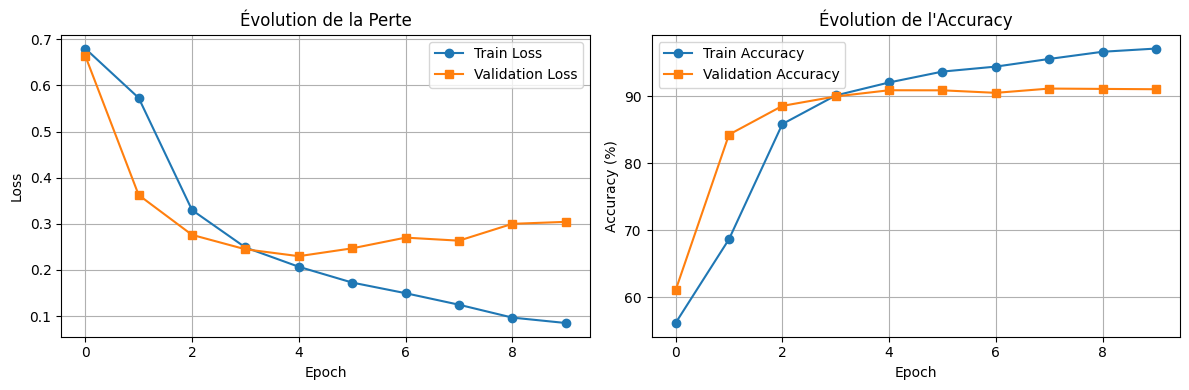


RÉSULTATS SUR L'ENSEMBLE DE TEST
Test Loss: 0.2311
Test Accuracy: 90.95%

RAPPORT DE CLASSIFICATION
              precision    recall  f1-score   support

    Negative       0.93      0.89      0.91      5000
    Positive       0.89      0.93      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



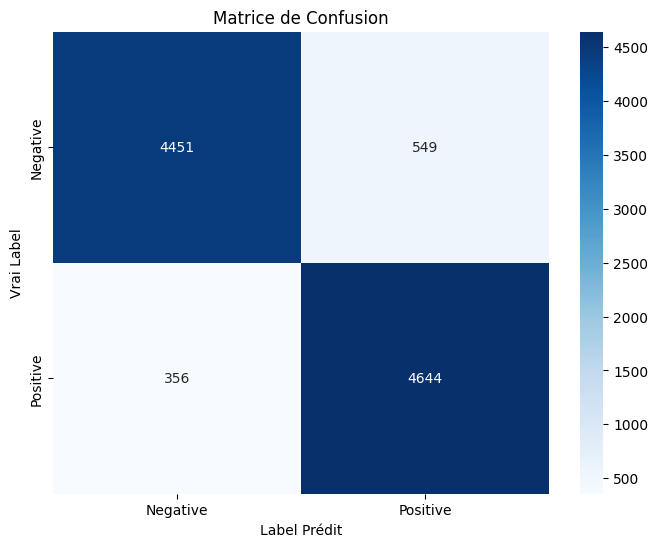


TESTS SUR DE NOUVEAUX EXEMPLES

1. Review: This movie was absolutely fantastic! I loved every minute of it.
   Sentiment: POSITIVE (Confiance: 99.64%)

2. Review: Terrible film, waste of time and money. Very disappointed.
   Sentiment: NEGATIVE (Confiance: 94.60%)

3. Review: An okay movie, nothing special but not terrible either.
   Sentiment: NEGATIVE (Confiance: 85.48%)

4. Review: One of the best films I've ever seen. Incredible performances!
   Sentiment: POSITIVE (Confiance: 99.82%)

5. Review: Boring and predictable. I fell asleep halfway through.
   Sentiment: NEGATIVE (Confiance: 99.77%)

PROJET TERMINÉ AVEC SUCCÈS!


In [5]:
"""
Projet d'Analyse de Sentiment avec PyTorch
Dataset: IMDB Movie Reviews (50k critiques)
Objectif pédagogique: Comprendre l'implémentation complète d'un modèle de Deep Learning
"""

# ============================================================================
# 0. INSTALLATION DES DÉPENDANCES
# ============================================================================

# Installer les bibliothèques nécessaires
# PyTorch est déjà préinstallé sur Google Colab
# On installe uniquement les packages manquants si besoin

import sys
print("Vérification et installation des dépendances...")

# Vérifier la version de Python
print(f"Python version: {sys.version}")

# Installation de packages supplémentaires si nécessaire
try:
    import torch
    print(f"✓ PyTorch {torch.__version__} déjà installé")
except ImportError:
    print("Installation de PyTorch...")
    !pip install torch torchvision

try:
    import sklearn
    print(f"✓ Scikit-learn déjà installé")
except ImportError:
    print("Installation de scikit-learn...")
    !pip install scikit-learn

try:
    import seaborn
    print(f"✓ Seaborn déjà installé")
except ImportError:
    print("Installation de seaborn...")
    !pip install seaborn

# Les autres packages (numpy, pandas, matplotlib) sont préinstallés sur Colab

print("\n✓ Toutes les dépendances sont prêtes!\n")

# ============================================================================
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string

# PyTorch et modules associés
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

# Configuration pour la reproductibilité
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

# Vérification du GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Utilisation de: {device}")

# ============================================================================
# 2. CHARGEMENT ET EXPLORATION DES DONNÉES
# ============================================================================

# Le dataset est déjà importé dans la session Colab
# Lecture du fichier CSV
# Note: Assurez-vous que le fichier s'appelle exactement 'IMDB Dataset.csv'
# Si le nom est différent, modifiez le chemin ci-dessous

try:
    df = pd.read_csv('IMDB Dataset.csv')
    print("✓ Dataset chargé avec succès!")
except FileNotFoundError:
    print("❌ Erreur: Fichier 'IMDB Dataset.csv' non trouvé.")
    print("Vérifiez que le fichier est bien dans le répertoire courant.")
    print("\nFichiers disponibles dans le répertoire:")
    import os
    print(os.listdir())
    raise

print("=" * 60)
print("APERÇU DU DATASET")
print("=" * 60)
print(f"\nNombre de lignes: {len(df)}")
print(f"\nPremières lignes:\n{df.head()}")
print(f"\nDistribution des sentiments:\n{df['sentiment'].value_counts()}")
print(f"\nValeurs manquantes:\n{df.isnull().sum()}")

# Visualisation de la distribution
plt.figure(figsize=(8, 5))
df['sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de critiques')
plt.xticks(rotation=0)
plt.show()

# ============================================================================
# 3. PRÉTRAITEMENT DES DONNÉES
# ============================================================================

class TextPreprocessor:
    """
    Classe pour le prétraitement du texte
    - Nettoyage du texte (balises HTML, ponctuation, etc.)
    - Tokenization (division en mots)
    - Construction du vocabulaire
    """

    def __init__(self, max_vocab_size=10000):
        """
        Args:
            max_vocab_size: Nombre maximum de mots dans le vocabulaire
        """
        self.max_vocab_size = max_vocab_size
        self.word2idx = {}  # Dictionnaire mot -> index
        self.idx2word = {}  # Dictionnaire index -> mot

    def clean_text(self, text):
        """
        Nettoie le texte en:
        - Supprimant les balises HTML
        - Convertissant en minuscules
        - Supprimant la ponctuation excessive
        """
        # Supprimer les balises HTML comme <br />
        text = re.sub(r'<.*?>', ' ', text)
        # Convertir en minuscules
        text = text.lower()
        # Supprimer les caractères spéciaux mais garder les apostrophes
        text = re.sub(r'[^a-zA-Z\s\']', ' ', text)
        # Supprimer les espaces multiples
        text = re.sub(r'\s+', ' ', text)
        return text.strip()

    def tokenize(self, text):
        """
        Divise le texte en tokens (mots)
        """
        return text.split()

    def build_vocabulary(self, texts):
        """
        Construit le vocabulaire à partir des textes
        Les mots les plus fréquents sont conservés
        """
        # Compter la fréquence de chaque mot
        word_freq = {}
        for text in texts:
            tokens = self.tokenize(self.clean_text(text))
            for token in tokens:
                word_freq[token] = word_freq.get(token, 0) + 1

        # Filtrer les mots trop rares (apparaissent moins de 3 fois)
        word_freq = {word: freq for word, freq in word_freq.items() if freq >= 3}

        # Trier par fréquence décroissante
        sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

        # Créer le vocabulaire avec tokens spéciaux
        # <PAD>: pour le padding (compléter les séquences)
        # <UNK>: pour les mots inconnus
        self.word2idx = {'<PAD>': 0, '<UNK>': 1}

        # Ajouter les mots les plus fréquents
        for idx, (word, _) in enumerate(sorted_words[:self.max_vocab_size - 2], start=2):
            self.word2idx[word] = idx

        # Créer le dictionnaire inverse
        self.idx2word = {idx: word for word, idx in self.word2idx.items()}

        print(f"\nVocabulaire construit: {len(self.word2idx)} mots")
        print(f"Exemples de mots fréquents: {list(self.word2idx.keys())[2:12]}")

    def text_to_indices(self, text):
        """
        Convertit un texte en séquence d'indices
        Les mots inconnus sont remplacés par <UNK>
        """
        tokens = self.tokenize(self.clean_text(text))
        return [self.word2idx.get(token, self.word2idx['<UNK>']) for token in tokens]

# Initialiser le préprocesseur avec un vocabulaire plus grand
preprocessor = TextPreprocessor(max_vocab_size=15000)  # Augmenté pour mieux capturer le vocabulaire

# Construire le vocabulaire sur tout le dataset
preprocessor.build_vocabulary(df['review'].values)

# ============================================================================
# 4. CRÉATION DU DATASET PYTORCH
# ============================================================================

class IMDBDataset(Dataset):
    """
    Dataset PyTorch pour les critiques IMDB
    Hérite de torch.utils.data.Dataset
    """

    def __init__(self, reviews, sentiments, preprocessor):
        """
        Args:
            reviews: Liste des critiques textuelles
            sentiments: Liste des sentiments (positive/negative)
            preprocessor: Instance de TextPreprocessor
        """
        self.reviews = reviews
        # Convertir les sentiments en valeurs numériques: positive=1, negative=0
        self.sentiments = [1 if s == 'positive' else 0 for s in sentiments]
        self.preprocessor = preprocessor

    def __len__(self):
        """Retourne le nombre d'échantillons"""
        return len(self.reviews)

    def __getitem__(self, idx):
        """
        Retourne un échantillon (critique, sentiment) à l'index idx
        """
        # Convertir le texte en séquence d'indices
        review_indices = self.preprocessor.text_to_indices(self.reviews[idx])
        # Convertir en tenseur PyTorch
        review_tensor = torch.LongTensor(review_indices)
        sentiment_tensor = torch.LongTensor([self.sentiments[idx]])

        return review_tensor, sentiment_tensor

def collate_batch(batch):
    """
    Fonction de collation pour créer des batches
    Gère le padding pour que toutes les séquences aient la même longueur
    """
    # Séparer les critiques et les sentiments
    reviews, sentiments = zip(*batch)

    # Padding des séquences (ajouter des <PAD> pour égaliser les longueurs)
    reviews_padded = pad_sequence(reviews, batch_first=True, padding_value=0)
    sentiments = torch.cat(sentiments)

    return reviews_padded, sentiments

# ============================================================================
# 5. DIVISION DU DATASET (TRAIN/VALIDATION/TEST)
# ============================================================================

# Division en ensemble d'entraînement et de test (80/20)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['review'].values,
    df['sentiment'].values,
    test_size=0.2,
    random_state=SEED,
    stratify=df['sentiment']  # Maintenir la même distribution
)

# Division de l'ensemble d'entraînement en train et validation (80/20 du train)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts,
    train_labels,
    test_size=0.2,
    random_state=SEED,
    stratify=train_labels
)

print(f"\nTaille des ensembles:")
print(f"- Entraînement: {len(train_texts)}")
print(f"- Validation: {len(val_texts)}")
print(f"- Test: {len(test_texts)}")

# Créer les datasets PyTorch
train_dataset = IMDBDataset(train_texts, train_labels, preprocessor)
val_dataset = IMDBDataset(val_texts, val_labels, preprocessor)
test_dataset = IMDBDataset(test_texts, test_labels, preprocessor)

# Créer les DataLoaders (itérateurs sur les batches)
BATCH_SIZE = 32  # Réduit pour mieux généraliser

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,  # Mélanger les données à chaque epoch
    collate_fn=collate_batch
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=collate_batch
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=collate_batch
)

# ============================================================================
# 6. DÉFINITION DU MODÈLE LSTM
# ============================================================================

class SentimentLSTM(nn.Module):
    """
    Modèle LSTM pour l'analyse de sentiment

    Architecture:
    1. Embedding Layer: Convertit les indices de mots en vecteurs denses
    2. LSTM Layer: Traite la séquence et capture les dépendances temporelles
    3. Fully Connected Layer: Classification binaire (positive/negative)
    """

    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim,
                 n_layers, dropout, pad_idx):
        """
        Args:
            vocab_size: Taille du vocabulaire
            embedding_dim: Dimension des embeddings (représentation des mots)
            hidden_dim: Dimension de l'état caché du LSTM
            output_dim: Dimension de sortie (2 pour classification binaire)
            n_layers: Nombre de couches LSTM empilées
            dropout: Taux de dropout pour la régularisation
            pad_idx: Index du token de padding
        """
        super(SentimentLSTM, self).__init__()

        # Couche d'embedding: transforme les indices en vecteurs
        # vocab_size: nombre de mots différents
        # embedding_dim: taille du vecteur pour chaque mot
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)

        # LSTM: réseau récurrent qui traite les séquences
        # input_size: dimension des embeddings
        # hidden_size: nombre de neurones dans la couche cachée
        # num_layers: nombre de couches LSTM empilées
        # bidirectional: traite la séquence dans les deux sens
        # dropout: régularisation pour éviter le surapprentissage
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers=n_layers,
            bidirectional=True,  # LSTM bidirectionnel pour mieux capturer le contexte
            dropout=dropout if n_layers > 1 else 0,
            batch_first=True
        )

        # Couche fully connected pour la classification
        # *2 car bidirectionnel (concatène forward et backward)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

        # Dropout pour régularisation
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        """
        Propagation avant (forward pass)

        Args:
            text: Tenseur de forme [batch_size, seq_length]

        Returns:
            output: Logits de forme [batch_size, output_dim]
        """
        # text shape: [batch_size, seq_length]

        # 1. Embedding: [batch_size, seq_length] -> [batch_size, seq_length, embedding_dim]
        embedded = self.dropout(self.embedding(text))

        # 2. LSTM: traite la séquence
        # output: [batch_size, seq_length, hidden_dim * 2]
        # hidden: état caché final
        # cell: état de cellule final
        output, (hidden, cell) = self.lstm(embedded)

        # 3. Concaténer les états cachés finaux (forward et backward)
        # hidden shape: [n_layers * 2, batch_size, hidden_dim]
        # On prend les dernières couches forward et backward
        hidden_forward = hidden[-2, :, :]  # [batch_size, hidden_dim]
        hidden_backward = hidden[-1, :, :]  # [batch_size, hidden_dim]
        hidden_concat = torch.cat((hidden_forward, hidden_backward), dim=1)
        # hidden_concat shape: [batch_size, hidden_dim * 2]

        # 4. Dropout et couche fully connected
        hidden_concat = self.dropout(hidden_concat)
        output = self.fc(hidden_concat)  # [batch_size, output_dim]

        return output

# Hyperparamètres du modèle (optimisés pour de meilleures performances)
VOCAB_SIZE = len(preprocessor.word2idx)
EMBEDDING_DIM = 128  # Augmenté pour mieux capturer la sémantique
HIDDEN_DIM = 256     # Dimension de l'état caché du LSTM
OUTPUT_DIM = 2       # 2 classes: positive et negative
N_LAYERS = 2         # Nombre de couches LSTM
DROPOUT = 0.3        # Réduit pour éviter l'underfitting
PAD_IDX = preprocessor.word2idx['<PAD>']

# Instancier le modèle
model = SentimentLSTM(
    VOCAB_SIZE,
    EMBEDDING_DIM,
    HIDDEN_DIM,
    OUTPUT_DIM,
    N_LAYERS,
    DROPOUT,
    PAD_IDX
)

# Déplacer le modèle sur le GPU si disponible
model = model.to(device)

# Afficher le nombre de paramètres
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nLe modèle a {count_parameters(model):,} paramètres entraînables")

# ============================================================================
# 7. FONCTION D'ENTRAÎNEMENT
# ============================================================================

def train_epoch(model, dataloader, optimizer, criterion, device):
    """
    Entraîne le modèle pour une epoch

    Args:
        model: Modèle PyTorch
        dataloader: DataLoader pour l'entraînement
        optimizer: Optimiseur (Adam, SGD, etc.)
        criterion: Fonction de perte (loss)
        device: CPU ou GPU

    Returns:
        epoch_loss: Perte moyenne sur l'epoch
        epoch_acc: Accuracy moyenne sur l'epoch
    """
    model.train()  # Mode entraînement (active dropout, etc.)

    epoch_loss = 0
    epoch_acc = 0

    for batch_texts, batch_labels in dataloader:
        # Déplacer les données sur le GPU
        batch_texts = batch_texts.to(device)
        batch_labels = batch_labels.to(device)

        # 1. Réinitialiser les gradients
        optimizer.zero_grad()

        # 2. Forward pass: calculer les prédictions
        predictions = model(batch_texts)  # [batch_size, output_dim]

        # 3. Calculer la perte
        loss = criterion(predictions, batch_labels)

        # 4. Backward pass: calculer les gradients
        loss.backward()

        # 5. Mettre à jour les poids
        optimizer.step()

        # Calculer l'accuracy
        # torch.argmax trouve la classe avec le score le plus élevé
        pred_classes = torch.argmax(predictions, dim=1)
        acc = (pred_classes == batch_labels).float().mean()

        # Accumuler les métriques
        epoch_loss += loss.item()
        epoch_acc += acc.item()

    # Retourner les moyennes
    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

def evaluate(model, dataloader, criterion, device):
    """
    Évalue le modèle sur un ensemble de validation/test

    Args:
        model: Modèle PyTorch
        dataloader: DataLoader pour l'évaluation
        criterion: Fonction de perte
        device: CPU ou GPU

    Returns:
        epoch_loss: Perte moyenne
        epoch_acc: Accuracy moyenne
    """
    model.eval()  # Mode évaluation (désactive dropout, etc.)

    epoch_loss = 0
    epoch_acc = 0

    # Désactiver le calcul des gradients (économise mémoire et calcul)
    with torch.no_grad():
        for batch_texts, batch_labels in dataloader:
            batch_texts = batch_texts.to(device)
            batch_labels = batch_labels.to(device)

            # Forward pass
            predictions = model(batch_texts)

            # Calculer la perte
            loss = criterion(predictions, batch_labels)

            # Calculer l'accuracy
            pred_classes = torch.argmax(predictions, dim=1)
            acc = (pred_classes == batch_labels).float().mean()

            # Accumuler les métriques
            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

# ============================================================================
# 8. CONFIGURATION DE L'ENTRAÎNEMENT
# ============================================================================

# Fonction de perte: Cross Entropy pour la classification
criterion = nn.CrossEntropyLoss()

# Optimiseur: Adam avec learning rate ajusté
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Scheduler pour réduire le learning rate si le modèle stagne
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',      # Réduire quand la loss ne diminue plus
    factor=0.5,      # Multiplier le LR par 0.5
    patience=2       # Attendre 2 epochs sans amélioration
)

# Nombre d'epochs (augmenté pour laisser le modèle converger)
N_EPOCHS = 10

# Historique pour la visualisation
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# ============================================================================
# 9. BOUCLE D'ENTRAÎNEMENT
# ============================================================================

print("\n" + "=" * 60)
print("DÉBUT DE L'ENTRAÎNEMENT")
print("=" * 60)

best_val_loss = float('inf')
patience_counter = 0
EARLY_STOP_PATIENCE = 5  # Arrêter si pas d'amélioration après 5 epochs
current_lr = 0.001

for epoch in range(N_EPOCHS):
    # Entraîner pour une epoch
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion, device)

    # Évaluer sur l'ensemble de validation
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    # Ajuster le learning rate selon la performance
    old_lr = optimizer.param_groups[0]['lr']
    scheduler.step(val_loss)
    new_lr = optimizer.param_groups[0]['lr']

    # Sauvegarder l'historique
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    # Afficher les résultats
    print(f'\nEpoch {epoch + 1}/{N_EPOCHS}')
    print(f'  Train Loss: {train_loss:.4f} | Train Acc: {train_acc * 100:.2f}%')
    print(f'  Val Loss: {val_loss:.4f} | Val Acc: {val_acc * 100:.2f}%')

    # Afficher si le learning rate a changé
    if new_lr < old_lr:
        print(f'  📉 Learning rate réduit: {old_lr:.6f} → {new_lr:.6f}')

    # Sauvegarder le meilleur modèle
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pt')
        print('  ✓ Meilleur modèle sauvegardé!')
    else:
        patience_counter += 1
        print(f'  Pas d\'amélioration ({patience_counter}/{EARLY_STOP_PATIENCE})')

    # Early stopping
    if patience_counter >= EARLY_STOP_PATIENCE:
        print(f'\n⚠️ Early stopping après {epoch + 1} epochs sans amélioration')
        break

# ============================================================================
# 10. VISUALISATION DES RÉSULTATS
# ============================================================================

# Graphique de la perte
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Évolution de la Perte')
plt.legend()
plt.grid(True)

# Graphique de l'accuracy
plt.subplot(1, 2, 2)
plt.plot([acc * 100 for acc in train_accs], label='Train Accuracy', marker='o')
plt.plot([acc * 100 for acc in val_accs], label='Validation Accuracy', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Évolution de l\'Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ============================================================================
# 11. ÉVALUATION SUR L'ENSEMBLE DE TEST
# ============================================================================

# Charger le meilleur modèle
model.load_state_dict(torch.load('best_model.pt'))

# Évaluer sur le test set
test_loss, test_acc = evaluate(model, test_loader, criterion, device)

print("\n" + "=" * 60)
print("RÉSULTATS SUR L'ENSEMBLE DE TEST")
print("=" * 60)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Prédictions détaillées pour le rapport de classification
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_texts, batch_labels in test_loader:
        batch_texts = batch_texts.to(device)
        predictions = model(batch_texts)
        pred_classes = torch.argmax(predictions, dim=1)

        all_preds.extend(pred_classes.cpu().numpy())
        all_labels.extend(batch_labels.numpy())

# Rapport de classification
print("\n" + "=" * 60)
print("RAPPORT DE CLASSIFICATION")
print("=" * 60)
print(classification_report(all_labels, all_preds,
                          target_names=['Negative', 'Positive']))

# Matrice de confusion
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Matrice de Confusion')
plt.ylabel('Vrai Label')
plt.xlabel('Label Prédit')
plt.show()

# ============================================================================
# 12. FONCTION DE PRÉDICTION POUR DE NOUVEAUX TEXTES
# ============================================================================

def predict_sentiment(text, model, preprocessor, device):
    """
    Prédit le sentiment d'un nouveau texte

    Args:
        text: Texte à analyser
        model: Modèle entraîné
        preprocessor: Préprocesseur de texte
        device: CPU ou GPU

    Returns:
        sentiment: 'positive' ou 'negative'
        probability: Probabilité de la prédiction
    """
    model.eval()

    # Prétraiter le texte
    indices = preprocessor.text_to_indices(text)
    tensor = torch.LongTensor(indices).unsqueeze(0).to(device)  # Ajouter dimension batch

    # Faire la prédiction
    with torch.no_grad():
        output = model(tensor)
        probabilities = torch.softmax(output, dim=1)
        prediction = torch.argmax(probabilities, dim=1)

    sentiment = 'positive' if prediction.item() == 1 else 'negative'
    probability = probabilities[0][prediction].item()

    return sentiment, probability

# ============================================================================
# 13. TESTS SUR DE NOUVEAUX EXEMPLES
# ============================================================================

print("\n" + "=" * 60)
print("TESTS SUR DE NOUVEAUX EXEMPLES")
print("=" * 60)

# Exemples de test
test_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "Terrible film, waste of time and money. Very disappointed.",
    "An okay movie, nothing special but not terrible either.",
    "One of the best films I've ever seen. Incredible performances!",
    "Boring and predictable. I fell asleep halfway through."
]

for i, review in enumerate(test_reviews, 1):
    sentiment, prob = predict_sentiment(review, model, preprocessor, device)
    print(f"\n{i}. Review: {review}")
    print(f"   Sentiment: {sentiment.upper()} (Confiance: {prob * 100:.2f}%)")

print("\n" + "=" * 60)
print("PROJET TERMINÉ AVEC SUCCÈS!")
print("=" * 60)

In [7]:
# Sauvegarde du modèle complet (architecture + poids)
torch.save(model, 'sentiment_model_complete.pth')
print("✓ Modèle complet sauvegardé dans 'sentiment_model_complete.pth'")


✓ Modèle complet sauvegardé dans 'sentiment_model_complete.pth'


In [8]:
import pickle

# Sauvegarder le vocabulaire
vocab_data = {
    'word2idx': preprocessor.word2idx,
    'idx2word': preprocessor.idx2word,
    'max_vocab_size': preprocessor.max_vocab_size
}

with open('vocabulary.pkl', 'wb') as f:
    pickle.dump(vocab_data, f)

print("✓ Vocabulaire sauvegardé")

# Télécharger le fichier
from google.colab import files
files.download('vocabulary.pkl')

✓ Vocabulaire sauvegardé


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# Sur Colab - À la fin de l'entraînement
torch.save({
    'model_state_dict': model.state_dict(),
    'vocab_size': VOCAB_SIZE,
    'embedding_dim': EMBEDDING_DIM,
    'hidden_dim': HIDDEN_DIM,
    'output_dim': OUTPUT_DIM,
    'n_layers': N_LAYERS,
    'dropout': DROPOUT,
    'pad_idx': PAD_IDX
}, 'model_weights.pth')